# Data Exploration

In [1]:
# Loading the dataset
import pandas as pd
df = pd.read_csv("Employee.csv")
df.head()

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0


In [2]:
print("Shape:", df.shape)
print("Columns:", df.columns)

Shape: (148, 6)
Columns: Index(['Company', 'Age', 'Salary', 'Place', 'Country', 'Gender'], dtype='object')


In [3]:
# displaying unique column values and length of each feature
for col in df.columns:
    print(f"{col} → Unique: {df[col].unique()}, \nCount: {len(df[col].unique())}")

Company → Unique: ['TCS' 'Infosys' 'CTS' nan 'Tata Consultancy Services' 'Congnizant'
 'Infosys Pvt Lmt'], 
Count: 7
Age → Unique: [20. 30. 35. 40. 23. nan 34. 45. 18. 22. 32. 37. 50. 21. 46. 36. 26. 41.
 24. 25. 43. 19. 38. 51. 31. 44. 33. 17.  0. 54.], 
Count: 30
Salary → Unique: [  nan 2300. 3000. 4000. 5000. 6000. 7000. 8000. 9000. 1089. 1234. 3030.
 3045. 3184. 4824. 5835. 7084. 8943. 8345. 9284. 9876. 2034. 7654. 2934.
 4034. 5034. 8202. 9024. 4345. 6544. 6543. 3234. 4324. 5435. 5555. 8787.
 3454. 5654. 5009. 5098. 3033.], 
Count: 41
Place → Unique: ['Chennai' 'Mumbai' 'Calcutta' 'Delhi' 'Podicherry' 'Cochin' nan 'Noida'
 'Hyderabad' 'Bhopal' 'Nagpur' 'Pune'], 
Count: 12
Country → Unique: ['India'], 
Count: 1
Gender → Unique: [0 1], 
Count: 2


In [4]:
# Performing statistical analysis
df.describe()

,Age,Salary,Gender
count,130.000000,124.000000,148.000000
mean,30.484615,5312.467742,0.222973
std,11.096640,2573.764683,0.417654
min,0.000000,1089.000000,0.000000
25%,22.000000,3030.000000,0.000000
50%,32.500000,5000.000000,0.000000
75%,37.750000,8000.000000,0.000000
max,54.000000,9876.000000,1.000000


In [5]:
# Renaming columns
df.columns = ['Company_name', 'Employee_age', 'Monthly_salary', 'City', 'Nationality', 'Gender_identity']
df.columns = df.columns.str.lower().str.strip()
df

,company_name,employee_age,monthly_salary,city,nationality,gender_identity
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


In [6]:
df.nunique() # displays the no: of unique values in each column

company_name        6
employee_age       29
monthly_salary     40
city               11
nationality         1
gender_identity     2
dtype: int64

# Data Cleaning

In [7]:
# Finding count of missing values in each column
df.isnull().sum()   

company_name        8
employee_age       18
monthly_salary     24
city               14
nationality         0
gender_identity     0
dtype: int64

In [9]:
# Replacing missing values in employee_age and monthly_salary
# replace age '0' with Nan
import numpy as np
df.loc[df['employee_age'] == 0, 'employee_age'] = np.nan

In [11]:
df[df['employee_age']=='Nan']
# there are no entries with age as 0

,company_name,employee_age,monthly_salary,city,nationality,gender_identity


In [12]:
# replacing missing values in employee_age and monthly_salary with mean values 
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="mean") 
df[['employee_age', 'monthly_salary']] = imputer.fit_transform(df[['employee_age', 'monthly_salary']])

In [13]:
# count of missing values in company_name
df['company_name'].isnull().sum()

8

In [14]:
# replacing missing values in company_name with Unknown
df['company_name'] = df['company_name'].fillna('Unknown')
df[df['company_name']=='Unknown']

,company_name,employee_age,monthly_salary,city,nationality,gender_identity
37,Unknown,35.000000,5312.467742,Hyderabad,India,0
51,Unknown,24.000000,3000.000000,Mumbai,India,0
61,Unknown,25.000000,8943.000000,NaN,India,1
64,Unknown,25.000000,6543.000000,Noida,India,0
109,Unknown,33.000000,5312.467742,Calcutta,India,0
123,Unknown,31.959677,3454.000000,Calcutta,India,0
133,Unknown,22.000000,8943.000000,Chennai,India,0
136,Unknown,31.959677,5312.467742,Delhi,India,0


In [15]:
# replacing missing values in city with Unknown
df['city'] = df['city'].fillna('Unknown')
df[df['city']=='Unknown']

,company_name,employee_age,monthly_salary,city,nationality,gender_identity
33,TCS,36.000000,5034.000000,Unknown,India,0
34,Infosys,26.000000,8202.000000,Unknown,India,0
35,TCS,35.000000,9024.000000,Unknown,India,1
41,Infosys,31.959677,5000.000000,Unknown,India,0
42,TCS,31.959677,6000.000000,Unknown,India,0
43,Infosys,25.000000,7000.000000,Unknown,India,0
61,Unknown,25.000000,8943.000000,Unknown,India,1
62,Tata Consultancy Services,36.000000,8345.000000,Unknown,India,1
63,CTS,41.000000,9284.000000,Unknown,India,1
116,TCS,33.000000,8787.000000,Unknown,India,1


In [16]:
# Remove duplicates
df.drop_duplicates(inplace=True)

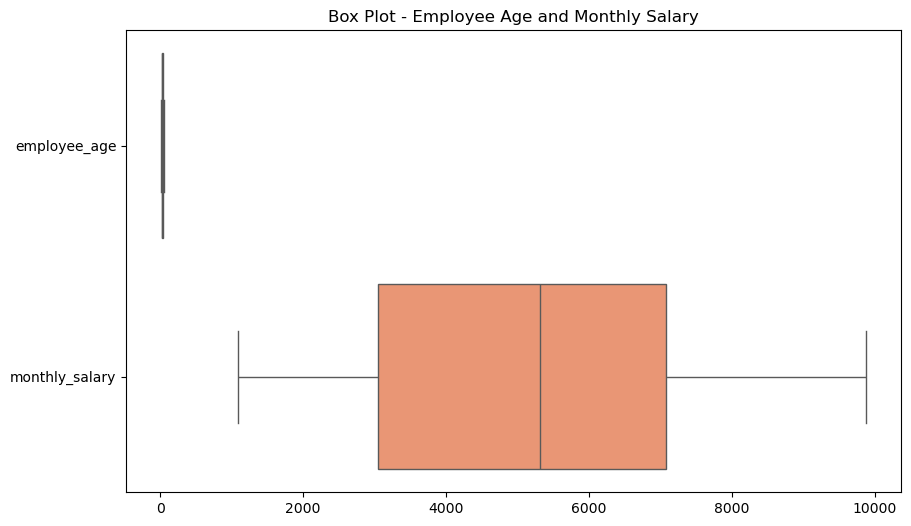

In [17]:
# Detecting Outliers
import matplotlib.pyplot as plt
import seaborn as sns

# Box plot for 'employee_age' and 'monthly_salary'
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['employee_age', 'monthly_salary']], orient='h', palette="Set2")
plt.title('Box Plot - Employee Age and Monthly Salary')
plt.show()

# Data Analysis

In [18]:
# Filtering the data with age >40 and salary<5000 
import matplotlib.pyplot as plt
import seaborn as sns

filtered_df = df[(df['employee_age'] > 40) & (df['monthly_salary'] < 5000)]
filtered_df

,company_name,employee_age,monthly_salary,city,nationality,gender_identity
21,Infosys,50.0,3184.0,Delhi,India,0
32,Infosys,45.0,4034.0,Calcutta,India,0
39,Infosys,41.0,3000.0,Mumbai,India,0
50,Infosys,41.0,3000.0,Chennai,India,0
57,Infosys,51.0,3184.0,Hyderabad,India,0
68,Infosys,43.0,4034.0,Mumbai,India,0
75,Infosys,44.0,3000.0,Cochin,India,0
86,Infosys,41.0,3000.0,Delhi,India,0
93,Infosys,54.0,3184.0,Mumbai,India,0
104,Infosys,44.0,4034.0,Delhi,India,0


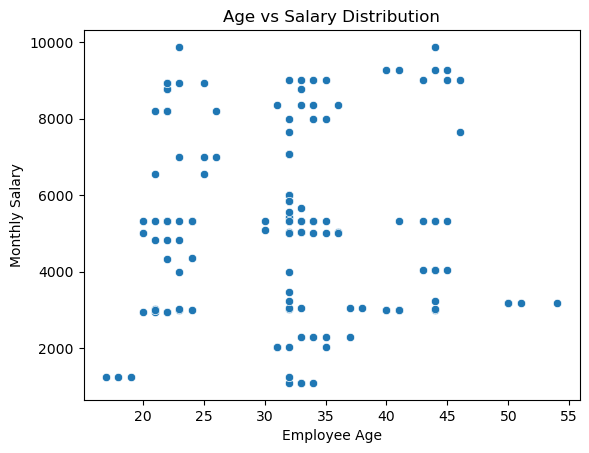

In [19]:
# Plotting the chart with employee_age and monthly_salary
sns.scatterplot(x='employee_age', y='monthly_salary', data=df)
plt.xlabel("Employee Age")
plt.ylabel("Monthly Salary")
plt.title("Age vs Salary Distribution")
plt.show()

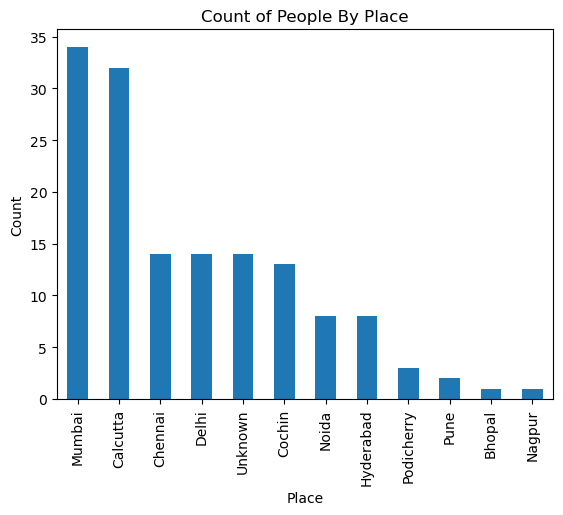

In [20]:
# Count people by place
place_counts = df['city'].value_counts()
place_counts.plot(kind='bar', title='Number of People by Place')
plt.xlabel('Place')
plt.ylabel('Count')
plt.title('Count of People By Place')
plt.show()